# endothelial

In [1]:
library(Seurat)
library(pheatmap)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)

Attaching SeuratObject


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：Rcpp



In [2]:
top_genes = function(degs){
    rownames(degs) = NULL
    for (cluster in unique(degs$cluster)){
        message(cluster)
        print(degs[degs$cluster == cluster,] %>% arrange(desc(avg_log2FC)) %>% head(n=50))
    } 
}

In [3]:
endothelial = readRDS('~/HPV/res/public_rna/seurat_rds/annotated/endothelial.rds')

In [4]:
Idents(endothelial) = endothelial$minor
degs = FindAllMarkers(endothelial,logfc.threshold = 0.25,return.thresh = 0.05)

Calculating cluster Tip

Calculating cluster EC_Lymphatic

Calculating cluster others

Calculating cluster EC_Arterial

Calculating cluster HEV

Calculating cluster EC_MKI67+

Calculating cluster EC_Immature

Calculating cluster EC_Vein



In [5]:
top_genes(degs)

Tip



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster       gene
1  1.446607e-13  1.3362469 0.265 0.142 2.754195e-09     Tip       SPP1
2  3.726982e-26  1.2173338 0.222 0.074 7.095800e-22     Tip     IGFBP5
3  2.488686e-17  1.2038454 0.792 0.598 4.738210e-13     Tip     HSPA1A
4  8.532946e-36  1.1576507 0.662 0.416 1.624588e-31     Tip     CITED4
5  7.049508e-26  1.1443607 0.705 0.495 1.342156e-21     Tip   SERPINE1
6  4.108232e-09  1.1324629 0.479 0.326 7.821662e-05     Tip       QPCT
7  2.395427e-43  1.0971708 0.495 0.207 4.560653e-39     Tip       ESM1
8  3.544289e-76  1.0864567 0.332 0.065 6.747973e-72     Tip       APLN
9  2.099505e-29  1.0376814 0.515 0.289 3.997248e-25     Tip     HAPLN1
10 1.021980e-30  1.0248884 0.525 0.290 1.945749e-26     Tip    TNFAIP3
11 6.606269e-14  0.9530678 0.405 0.254 1.257768e-09     Tip     HSPA1B
12 5.003837e-31  0.9294650 0.876 0.732 9.526806e-27     Tip     LGALS1
13 2.988410e-06  0.9070570 0.153 0.085 5.689633e-02     Tip AL627171.2
14 1.2

EC_Lymphatic



           p_val avg_log2FC pct.1 pct.2     p_val_adj      cluster      gene
1  8.607644e-204   5.578685 0.536 0.004 1.638809e-199 EC_Lymphatic     CCL21
2   5.272686e-26   2.868125 0.571 0.071  1.003867e-21 EC_Lymphatic    AKAP12
3   9.615391e-28   2.852618 0.464 0.041  1.830674e-23 EC_Lymphatic     HSPA6
4   3.316303e-49   2.812236 0.714 0.058  6.313910e-45 EC_Lymphatic     PRKG1
5  1.080229e-120   2.677848 0.643 0.016 2.056648e-116 EC_Lymphatic     NRXN3
6  9.836381e-205   2.612887 0.571 0.005 1.872749e-200 EC_Lymphatic      PDPN
7  2.650198e-241   2.455628 0.500 0.002 5.045713e-237 EC_Lymphatic      RELN
8   1.327579e-16   2.428452 0.679 0.172  2.527577e-12 EC_Lymphatic     THSD4
9  5.321470e-151   2.321082 0.607 0.010 1.013155e-146 EC_Lymphatic   COLEC12
10  1.651879e-79   2.248293 0.607 0.024  3.145012e-75 EC_Lymphatic     EFNA5
11 3.967132e-140   2.227114 0.536 0.008 7.553022e-136 EC_Lymphatic     FABP4
12  2.000825e-56   2.158542 0.500 0.023  3.809371e-52 EC_Lymphatic      TNIK

others



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster     gene
1   5.400189e-10   3.691295 0.114 0.042  1.028142e-05  others     MMP1
2   1.154751e-12   3.508663 0.253 0.130  2.198530e-08  others     LY6D
3   2.286607e-29   3.395761 0.239 0.071  4.353471e-25  others    KRT14
4   1.190130e-41   3.121107 0.200 0.036  2.265888e-37  others   CXCL10
5   2.184849e-17   3.018221 0.492 0.331  4.159734e-13  others   S100A2
6   8.711485e-03   2.540610 0.536 0.514  1.000000e+00  others    IGLC2
7   1.087364e-21   2.489403 0.786 0.704  2.070233e-17  others   S100A9
8   4.292452e-15   2.369920 0.386 0.241  8.172399e-11  others    KRT17
9   2.880908e-25   2.333999 0.469 0.266  5.484960e-21  others     KRT5
10  1.780658e-16   2.323097 0.392 0.240  3.390195e-12  others    KRT19
11  5.043960e-14   2.266829 0.681 0.606  9.603196e-10  others   S100A8
12  2.503379e-14   2.144092 0.378 0.233  4.766183e-10  others SERPINB3
13  5.043203e-26   2.098863 0.433 0.219  9.601754e-22  others    KRT6A
14  1.

EC_Arterial



           p_val avg_log2FC pct.1 pct.2     p_val_adj     cluster        gene
1  4.185700e-154  2.6700540 0.968 0.837 7.969153e-150 EC_Arterial        SAT1
2  8.406535e-157  2.1223093 0.885 0.375 1.600520e-152 EC_Arterial      IGFBP3
3   0.000000e+00  2.0228017 0.732 0.074  0.000000e+00 EC_Arterial        GJA4
4   1.022097e-43  1.9319577 0.904 0.728  1.945971e-39 EC_Arterial       ARL15
5   5.451384e-40  1.8820659 0.608 0.382  1.037889e-35 EC_Arterial       ENPP2
6  6.073182e-216  1.7556347 0.934 0.410 1.156273e-211 EC_Arterial       EFNB2
7  7.994144e-152  1.5396974 0.984 0.793 1.522005e-147 EC_Arterial    SLC9A3R2
8  1.709865e-144  1.4626817 0.821 0.311 3.255413e-140 EC_Arterial        ALPL
9   4.846023e-55  1.4153970 0.656 0.365  9.226343e-51 EC_Arterial      S100A4
10 3.009383e-260  1.3916138 0.477 0.019 5.729564e-256 EC_Arterial       FBLN5
11 9.474255e-104  1.3882263 0.941 0.716  1.803803e-99 EC_Arterial       PLPP1
12  3.571886e-64  1.3744429 0.434 0.150  6.800514e-60 EC_Arteria

HEV



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster      gene
1   0.000000e+00  3.0019042 0.945 0.289  0.000000e+00     HEV     ACKR1
2  9.342092e-211  2.0072104 0.670 0.167 1.778641e-206     HEV       CLU
3  4.742911e-150  1.9510153 0.611 0.182 9.030028e-146     HEV      SELE
4  6.078280e-300  1.8142639 0.838 0.205 1.157244e-295     HEV      SELP
5  2.854418e-127  1.8120076 0.469 0.114 5.434527e-123     HEV  MIR99AHG
6  5.608944e-149  1.7915007 0.719 0.269 1.067887e-144     HEV      TLL1
7  4.020886e-265  1.7665602 0.828 0.234 7.655366e-261     HEV     MMRN1
8  1.676116e-194  1.6265137 0.506 0.075 3.191158e-190     HEV       CPE
9  1.093111e-165  1.5383574 0.904 0.510 2.081175e-161     HEV   ZNF385D
10  4.853082e-84  1.5183292 0.819 0.582  9.239783e-80     HEV     PLCB4
11 9.517808e-138  1.4312516 0.428 0.078 1.812096e-133     HEV     CCL23
12  1.214045e-51  1.4172945 0.507 0.270  2.311421e-47     HEV     PTGDS
13 4.227821e-144  1.4142707 0.796 0.402 8.049349e-140     HEV   

EC_MKI67+



           p_val avg_log2FC pct.1 pct.2     p_val_adj   cluster     gene
1   3.379558e-87  2.8982399 0.915 0.094  6.434341e-83 EC_MKI67+    CENPF
2   2.789187e-11  2.2210584 0.872 0.751  5.310332e-07 EC_MKI67+   LGALS1
3  7.782702e-227  2.0759290 0.809 0.019 1.481749e-222 EC_MKI67+    MKI67
4   9.026747e-77  1.9903851 0.787 0.075  1.718602e-72 EC_MKI67+    PTTG1
5  2.298399e-137  1.9655012 0.702 0.027 4.375921e-133 EC_MKI67+    TOP2A
6  5.210968e-149  1.9149947 0.574 0.015 9.921162e-145 EC_MKI67+     ASPM
7   6.415654e-15  1.9021815 0.851 0.660  1.221476e-10 EC_MKI67+    HMGN2
8   2.997987e-14  1.8558570 1.000 0.878  5.707867e-10 EC_MKI67+   TUBA1B
9   3.296302e-18  1.7278752 0.872 0.560  6.275829e-14 EC_MKI67+    STMN1
10  5.152534e-08  1.7178575 0.809 0.675  9.809910e-04 EC_MKI67+  ARL6IP1
11  2.526082e-02  1.7109415 0.277 0.165  1.000000e+00 EC_MKI67+      SFN
12  4.121784e-13  1.6397801 0.723 0.377  7.847464e-09 EC_MKI67+     SMC4
13  8.999895e-06  1.5815579 0.532 0.327  1.713490e-

EC_Immature



          p_val avg_log2FC pct.1 pct.2    p_val_adj     cluster     gene
1  4.545327e-57  1.4883242 0.295 0.090 8.653848e-53 EC_Immature     NOX5
2  1.921738e-98  1.1447135 0.976 0.906 3.658797e-94 EC_Immature      GSN
3  7.777978e-63  1.0470625 0.960 0.920 1.480849e-58 EC_Immature  TSC22D1
4  1.327378e-93  0.9079603 0.903 0.694 2.527195e-89 EC_Immature  TM4SF18
5  9.403565e-56  0.9078486 0.796 0.585 1.790345e-51 EC_Immature    ITIH5
6  1.211877e-28  0.8999467 0.704 0.573 2.307292e-24 EC_Immature   CAVIN2
7  9.510164e-74  0.8910918 0.965 0.842 1.810640e-69 EC_Immature     RGCC
8  1.025717e-33  0.8847888 0.517 0.336 1.952862e-29 EC_Immature   IGFBP2
9  6.363934e-34  0.8670332 0.787 0.670 1.211629e-29 EC_Immature  OSBPL1A
10 2.291723e-60  0.8261318 0.887 0.694 4.363212e-56 EC_Immature    TIMP3
11 2.353942e-34  0.8165411 0.501 0.315 4.481670e-30 EC_Immature    EDNRB
12 1.930790e-65  0.7944822 0.891 0.768 3.676030e-61 EC_Immature    CYB5A
13 4.868086e-26  0.7772010 0.865 0.782 9.268350e-22

EC_Vein



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster       gene
1  8.176208e-15  1.3054495 0.426 0.224 1.556668e-10 EC_Vein       CCN2
2  1.501412e-31  1.0150837 0.624 0.296 2.858539e-27 EC_Vein      CCL14
3  2.480197e-32  0.7785543 0.461 0.166 4.722047e-28 EC_Vein      FLRT2
4  3.738184e-24  0.7689607 0.686 0.407 7.117128e-20 EC_Vein     SLC8A1
5  4.958772e-25  0.7536911 0.624 0.333 9.441005e-21 EC_Vein   ADAMTSL1
6  6.851383e-33  0.7510780 0.907 0.584 1.304435e-28 EC_Vein    ZNF385D
7  2.424510e-18  0.7450436 0.578 0.330 4.616025e-14 EC_Vein      SNTG2
8  2.012797e-26  0.7417112 0.973 0.856 3.832163e-22 EC_Vein      TSHZ2
9  6.465816e-32  0.7181864 0.818 0.450 1.231027e-27 EC_Vein      NR2F2
10 1.760105e-24  0.7037759 0.860 0.635 3.351064e-20 EC_Vein     ZNF521
11 8.665487e-19  0.6987092 0.605 0.347 1.649822e-14 EC_Vein      MYRIP
12 2.673674e-11  0.6982502 0.682 0.516 5.090409e-07 EC_Vein        FN1
13 5.725093e-34  0.6867893 0.984 0.729 1.090000e-29 EC_Vein       PRCP
14 3.4

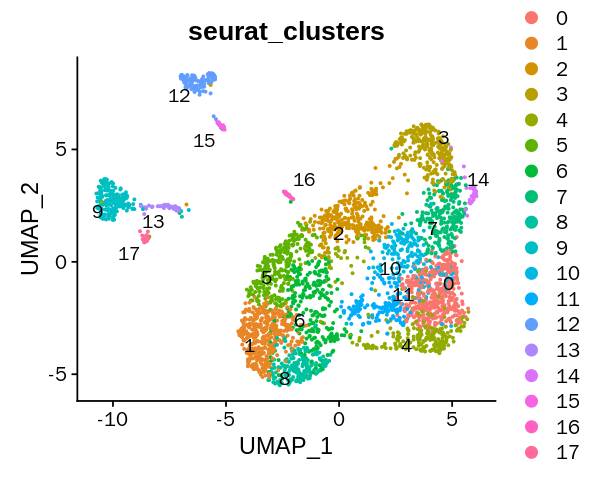

In [6]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(endothelial, group.by = 'seurat_clusters', label = TRUE,repel = TRUE)

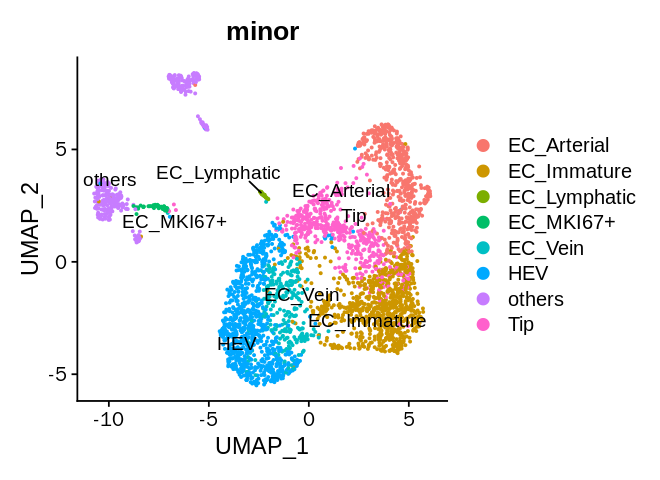

In [7]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(endothelial, group.by = 'minor', label = TRUE,repel = TRUE)

In [10]:
unique(endothelial$minor)

[1] "Tip"          "EC_Lymphatic" "others"       "EC_Arterial"  "HEV"         
[6] "EC_MKI67+"    "EC_Immature"  "EC_Vein"

In [35]:
Idents(endothelial) = endothelial$seurat_clusters
degs_8 = FindMarkers(endothelial,ident.1 = '8',logfc.threshold = 0.25,return.thresh = 0.05)

In [37]:
head(degs_8)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADGRG6,4.586722e-121,1.8016830,0.709,0.124,8.732660e-117
MIR99AHG,8.374799e-109,2.3367760,0.765,0.168,1.594478e-104
CPE,1.159107e-91,1.7610595,0.694,0.151,2.206823e-87
DLGAP1,8.027284e-63,1.7064969,0.638,0.174,1.528315e-58
NMUR2,1.519315e-62,0.2502979,0.184,0.011,2.892623e-58
NR2F2,2.332606e-60,1.3276086,0.893,0.453,4.441049e-56


In [44]:
endothelial$curated = endothelial$minor
endothelial$curated[endothelial$curated == 'Tip'] = 'Tip_ANGPTL2'
endothelial$curated[endothelial$curated == 'EC_Lymphatic'] = 'EC_Lymphatic_CCL21'
endothelial$curated[endothelial$curated == 'EC_Arterial'] = 'EC_Artery_GJA4'
endothelial$curated[endothelial$curated == 'EC_MKI67+'] = 'EC_MKI67'
endothelial$curated[endothelial$seurat_clusters %in% c(1,5,6)] = 'EC_Vein_CCL14'
endothelial$curated[endothelial$seurat_clusters %in% c(8)] = 'EC_Vein_ADGRG6'
endothelial$curated[endothelial$curated == 'EC_Immature'] = 'EC_Immature_APLNR'

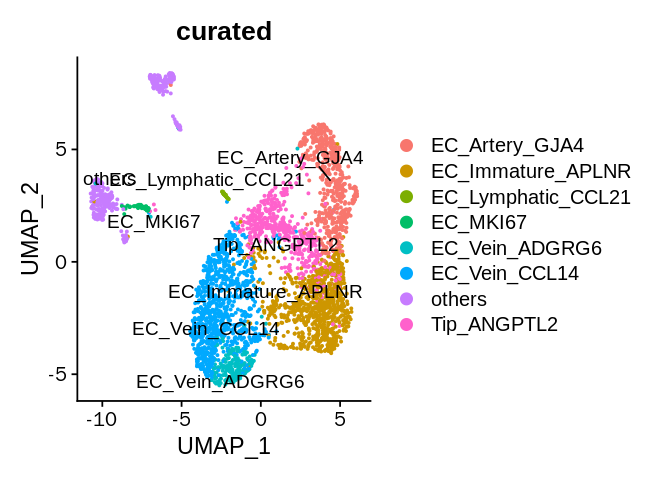

In [49]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(endothelial, group.by = 'curated', label = TRUE,repel = TRUE)

In [50]:
saveRDS(endothelial,file = '~/HPV/res/public_rna/seurat_rds/annotated/endothelial.rds')

# curate

In [1]:
library(Seurat)
library(dplyr)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
endothelial = readRDS('~/HPV/res/public_rna/seurat_rds/annotated/endothelial.rds')

In [3]:
endothelial$curated[endothelial$seurat_clusters %in% c('2')] = 'EC_Tip_APLN'
endothelial$curated[endothelial$seurat_clusters %in% c('0','11','4','10')] = 'EC_Immature_PIEZO2'

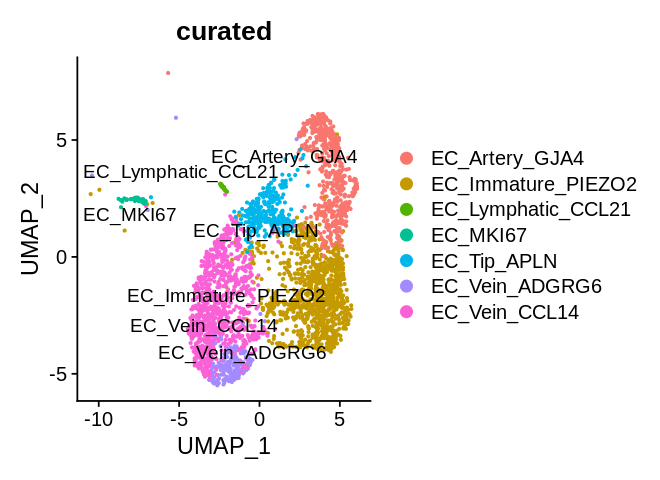

In [4]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(endothelial, group.by = 'curated', label = TRUE,repel = TRUE)

In [5]:
saveRDS(endothelial, file = '~/HPV/res/public_rna/seurat_rds/annotated/endothelial.rds')